Memory : 0.508
Memory : 463.009
IO : 0.5
IO : 9088.0
latency : 0.6599999999999999
latency : 12288.0
Thoughput : 1515.1515151515152
Thoughput : 0.08138020833333333


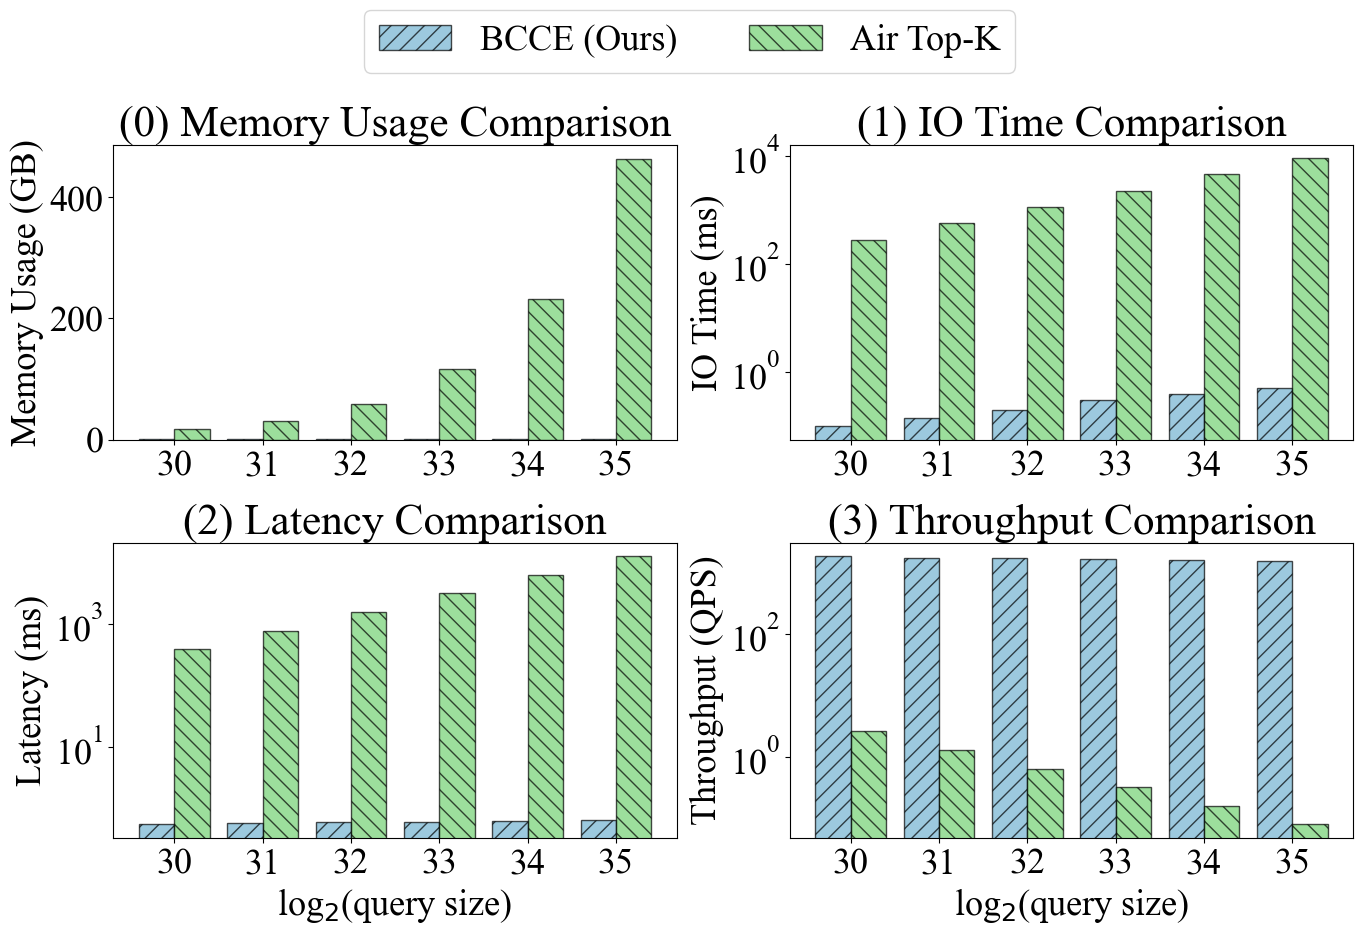

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读取 Excel 文件
def convert_to_float(value):
    return float(value.replace("ms", "")) if isinstance(value, str) else value

from matplotlib import rcParams
rcParams["font.size"] = 26
rcParams["font.family"] = "Times New Roman"

color_blue = "#72b3d0"  # BCCE 的颜色
color_green = "#72d072"  # baseline 的颜色
bar_width = 0.4  # 柱宽

fig, axs = plt.subplots(2, 2, figsize=(16, 9))

# Memory Usage
ax = axs[0, 0]
x_values = np.array([30, 31, 32, 33, 34, 35])  # 横坐标
BCCE = np.array([488, 492, 496, 500, 504, 508])/1000  # BCCE 的数据
baseline = np.array([5547, 9643, 17835, 34219, 66987, 132433])/1000  # baseline 的数据
baseline_cpu = np.array([12768, 20661, 41322, 82644, 165288, 330576])/1000  # baseline 的数据
ax.bar(x_values - 0.2, BCCE, width=0.4, label="BCCE (Ours)", color=color_blue, hatch="//", edgecolor="black", alpha=0.7)
ax.bar(x_values + 0.2, baseline + baseline_cpu, width=0.4, label = "Air Top-K", color = color_green, hatch='\\\\', edgecolor="black",alpha=0.7)
# ax.set_xlabel('log$_2$(N)')
ax.set_ylabel('Memory Usage (GB)')
ax.set_xticks(x_values)
ax.set_xticklabels(x_values)  # 旋转 x 轴标签防止重叠
ax.set_title(f"(0) Memory Usage Comparison")
# ax.set_yticks([30000, 60000])
print("Memory : " + str(BCCE[-1]))
print("Memory : " + str(baseline[-1] + baseline_cpu[-1]))


# IO Time
file_path = "io.xlsx"
xls = pd.ExcelFile(file_path)
df = xls.parse("Sheet1")
methods = df["Method"].values
start = 13
end = 19
x_values = np.array(df.columns[start:end], dtype=int)  # 取前 N 个 log2(N) 作为 x 轴
BCCE = df.iloc[0, start:end].apply(convert_to_float).values  # 取 BCCE 的前 N 个值
BCCE = [0.1,0.14,0.2, 0.31, 0.4, 0.5]
AirTopK = df.iloc[1, start:end].apply(convert_to_float).values  # 取 AirTopK 的前 N 个值
ax1 = axs[0, 1]
# ax1.set_xlabel('log$_2$(N)')
ax1.set_ylabel('IO Time (ms)')
ax1.set_yscale('log')
ax1.bar(x_values - 0.2, BCCE, width=0.4, label="BCCE (Ours)", color=color_blue, hatch="//", edgecolor="black", alpha=0.7)
ax1.bar(x_values + 0.2, AirTopK, width=0.4, label = "Air Top-K", color = color_green, hatch='\\\\', edgecolor="black",alpha=0.7)
ax1.set_xticks(x_values)  # 设定 x 轴刻度点
ax1.set_xticklabels(x_values)
ax1.set_title(f"(1) IO Time Comparison")
print("IO : " + str(BCCE[-1]))
print("IO : " + str(AirTopK[-1]))


# Latency
file_path = "latency.xlsx"
xls = pd.ExcelFile(file_path)
df = xls.parse("Sheet1")
start = 1
end = 7
x_values = np.array(df.columns[start:end], dtype=int)  # 取前 N 个 log2(N) 作为 x 轴
BCCE = df.iloc[0, start:end].apply(convert_to_float).values + df.iloc[2, start:end].apply(convert_to_float).values  # 取 BCCE 的前 N 个值
AirTopK = df.iloc[1, start:end].apply(convert_to_float).values + df.iloc[3, start:end].apply(convert_to_float).values # 取 AirTopK 的前 N 个值
ax2 = axs[1, 0]
ax2.set_xlabel('log$_2$(query size)')
ax2.set_ylabel('Latency (ms)')
ax2.set_yscale('log')
ax2.bar(x_values - 0.2, BCCE, width=0.4, label="BCCE (Ours)", color=color_blue, hatch="//", edgecolor="black", alpha=0.7)
ax2.bar(x_values + 0.2, AirTopK, width=0.4, label = "Air Top-K", color = color_green, hatch='\\\\', edgecolor="black",alpha=0.7)
ax2.set_xticks(x_values)  # 设定 x 轴刻度点
ax2.set_xticklabels(x_values)
ax2.set_title(f"(2) Latency Comparison")
print("latency : " + str(BCCE[-1]))

print("latency : " + str(AirTopK[-1]))

# Thoughput
file_path = "latency.xlsx"
xls = pd.ExcelFile(file_path)
df = xls.parse("Sheet1")
start = 1
end = 7
x_values = np.array(df.columns[start:end], dtype=int)  # 取前 N 个 log2(N) 作为 x 轴
BCCE = 1000 / (df.iloc[0, start:end].apply(convert_to_float).values + df.iloc[2, start:end].apply(convert_to_float).values)  # 取 BCCE 的前 N 个值
AirTopK = 1000 / (df.iloc[1, start:end].apply(convert_to_float).values + df.iloc[3, start:end].apply(convert_to_float).values) # 取 AirTopK 的前 N 个值
ax2 = axs[1, 1]
ax2.set_xlabel('log$_2$(query size)')
ax2.set_ylabel('Throughput (QPS)')
ax2.set_yscale('log')
ax2.bar(x_values - 0.2, BCCE, width=0.4, label="BCCE (Ours)", color=color_blue, hatch="//", edgecolor="black", alpha=0.7)
ax2.bar(x_values + 0.2, AirTopK, width=0.4, label = "Air Top-K", color = color_green, hatch='\\\\', edgecolor="black",alpha=0.7)
ax2.set_xticks(x_values)  # 设定 x 轴刻度点
ax2.set_xticklabels(x_values)
ax2.set_title(f"(3) Throughput Comparison")
print("Thoughput : " + str(BCCE[-1]))
print("Thoughput : " + str(AirTopK[-1]))



handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, bbox_to_anchor=(0.4, 0.95, 0.3, 0.1))

# plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.35, wspace=0.2)
# plt.savefig("Intro.pdf")
plt.savefig("Intro.pdf", bbox_inches="tight")
plt.show()
plt.close()